# Gene-Expression Differences in Peripheral Blood Between Lithium Responders and non-Responders in the Lithium Treatment-Moderate Dose Use Study

## Secção 1 - Exploração do Dataset Pela Análise de Dados e Metadados 

## Breve Descrição do Estudo e do Dataset

A Perturbação bipolar é uma patologia psiquiátrica crónica que se caracteriza por variações acentuadas do humor. Tipicamente, manifesta-se por episódios de elevação do humor, aumento da energia e da atividade e euforia, conhecidos como episódios maníacos ou hipomaníacos intercalados com fases de depressão e diminuição da energia e da atividade, conhecidos como episódios depressivos.
Estes episódios podem ser graves, moderados ou leves e tem um grande impacto no quotidiano da pessoa afetada, uma vez que afeta sensações, emoções, ideias e comportamentos da mesma, o que se traduz numa perda significativa de qualidade de vida e de autonomia. 
Segundo dados da Organização Mundial da Saúde (OMS), a doença bipolar atinge atualmente cerca de 140 milhões de pessoas no mundo, já na realidade portuguesa, estima-se que existam 200 mil casos afetando cerca de 2% da população.

O tratamento comum para desta patologia inclui terapia psicológica e o uso de medicamentos. Destes últimos destacam-se os medicamentos que contém lítio que atenua as mudanças de humor bipolares, mas não tem efeito no humor normal, sendo eficaz na prevenção de episódios maníacos e depressivos em pessoas com essa condição.

### Estudo 

Neste estudo pretende-se aferir a influência do lítio no controlo e tratamento dos sintomas associados a esta perturbação. Para isto foi feito o ensaio com 60 utentes, estes foram divididos em grupo de controlo e em grupo tratado com lítio. A todos os pacientes foram retiradas 2 amostras de sangue periférico uma antes do tratamento com lítio e outra após 1 mês. A resposta ao tratamento foi analisada 6 meses depois através da expressão genética obtida através das análises ao sangue. Os resultados identificam uma assinatura de expressão genética para a resposta ao tratamento com lítio em pacientes com perturbação bipolar.

### Dados Fornecidos 

Do estudo realizado resultaram dois ficheiros, o primeiro, referente aos dados (gds5393.csv) contém a expressão genética presente no sangue de cada amostra obtida, o segundo, referente aos metadados (meta-gds5393.csv), contém 120 amostras referentes às análises de sangue periférico de pacientes com transtorno bipolar.

Ao analisar o conjunto de dados, observamos que os metadados incluem informações essenciais, as variáveis, expostas em colunas: 

- sample: (GSMXXXXXXX) Identificador da amostra. Existem 120, referentes a duas amostras de colheita de sangue por paciente.
- agent: (control ou lithium) - Indica se a amostra é de um indivíduo de controlo ou de um submetido ao tratamento com lítio.
- other: (responder ou non-responder) - Identifica se a amostra é de um indivíduo onde se verificou resposta ou não ao tratamento.
- time: (baseline ou 1 month) - Indica quando é que a amostra foi recolhida.
- individual: Identificador único do indivíduo, que pode ser OPT_(N) para indivíduos de control e Li+OPT_(N) para indivíduos que receberam lítio. 
              Cada um tem duas amostras (baseline e 1 month).
- description: Descrição adicional sobre cada amostra.


## Data Import

Importar bibliotecas:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

Carregar dados e metadados do dataset:

In [16]:
data = pd.read_csv('Dataset5/gds5393.csv', index_col=0)
meta = pd.read_csv('Dataset5/meta-gds5393.csv', index_col = 0)

## Exploração de Dados

Começamos por ver o inicio do dataset referente aos Dados  

In [3]:
data.head()

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
ILMN_1343048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com o passo de cima só vemos 5 linhas do dataset para ver quantas linhas são fazemos o seguinte:

In [4]:
data.values.shape

(48107, 120)

Para uma melhor compreensão do dataset utilizamos o describe. Esta operação é útil para ter uma visão rápida e resumida do conjunto de dados, ajuda ainda a ver as características principais sem ter que examinar todas as informações detalhadamente. 
Esta foi feita de duas formas, por genes e por amostras

In [5]:
data.describe() ## by samples 

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
count,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,...,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000
mean,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,...,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577
std,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,...,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915
min,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,...,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480
25%,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735,6.815735,6.815730,6.815730,...,6.815735,6.815735,6.815735,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735
50%,6.940240,6.940240,6.940240,6.940240,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,...,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240
75%,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,...,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960
max,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,...,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700


Daqui vemos que existem vários dados nulos e que terão de ser tratados. Existem 48107 colunas de genes mas o count da tabela de baixo indica que existem apenas 47323

De seguida avaliamos o tipo de dados presentes no data set

In [6]:
data.dtypes

GSM1105438    float64
GSM1105486    float64
GSM1105487    float64
GSM1105490    float64
GSM1105491    float64
               ...   
GSM1105525    float64
GSM1105552    float64
GSM1105452    float64
GSM1105453    float64
GSM1105456    float64
Length: 120, dtype: object

 Os dados referentes as amostras são do tipo float64 isso indica que os dados são do tipo de dado "float" (ponto flutuante) com uma precisão de 64 bits.

## Exploração de Metadados

Da mesma forma que a exploração foi feita para os dados também é importante realizar esta analise no dataset referente aos metadados

In [7]:
meta.head()

,sample,agent,other,time,individual,description
GSM1105438,GSM1105438,control,non-responder,baseline,OPT_1,Value for GSM1105438: OPT_1-baseline; src: Per...
GSM1105486,GSM1105486,control,non-responder,baseline,OPT_11,Value for GSM1105486: OPT_11-baseline; src: Pe...
GSM1105487,GSM1105487,control,non-responder,baseline,OPT_12,Value for GSM1105487: OPT_12-baseline; src: Pe...
GSM1105490,GSM1105490,control,non-responder,baseline,OPT_13,Value for GSM1105490: OPT_13-baseline; src: Pe...
GSM1105491,GSM1105491,control,non-responder,baseline,OPT_14,Value for GSM1105491: OPT_14-baseline; src: Pe...


In [8]:
meta.values.shape

(120, 6)

120 linhas (amostras) e 6 colunas (variáveis)

In [9]:
meta.describe()

,sample,agent,other,time,individual,description
count,120,120,120,120,120,120
unique,120,2,2,2,60,120
top,GSM1105502,control,non-responder,baseline,OPT_1,Value for GSM1105502: Li+OPT_16-baseline; src:...
freq,1,64,94,60,2,1


Analisando esta tabela confirmamos que contém 120 amostras distintas ("sample")

A variável "agent" é representado por 2 valores distintos, o mais comum, com 64 amostras é o "control" 

Na variável responsavel por indicar se o individuo respondeu ou não ao tratamento, "other", também contém dois valores distintos. O mais comum é "non-responder" presente emc 94 amostras.

A variável correspondente ao tempo contém também dois valores, O valor "baseline" é o mais comum, ou seja a amostra retirada logo no inicio do tratamento 

No identificador unico de cada paciente, "individual", temos 60 valores, com uma frequência de 2, o que nos diz que cada paciente contem 2 amostras no conjunto de dados.

A variável que nos indica comentários adicionados à amostra, "description", tem 120 valores.

In [10]:
meta.dtypes

sample         object
agent          object
other          object
time           object
individual     object
description    object
dtype: object

Os metadados são do tipo "object" o que nos indica que as colunas contêm informações de texto ou uma combinação de diferentes tipos de dados.

### Representação Gráfica de Metadados

Representação de proporção de pacientes classificados como 'responders' e 'non-responders':

In [11]:
meta.groupby("other").size()

other
non-responder    94
responder        26
dtype: int64

<Axes: >

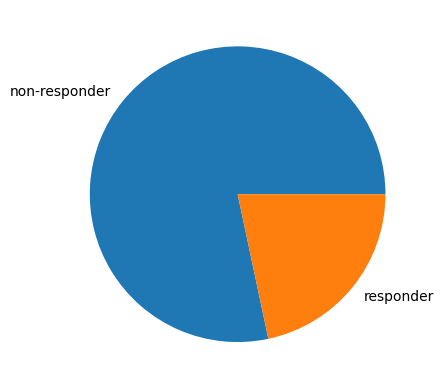

In [12]:
meta.groupby("other").size().plot.pie()

Representação de proporção de pacientes que receberam tratamento de controlo e tratamento com lítio:

<Axes: >

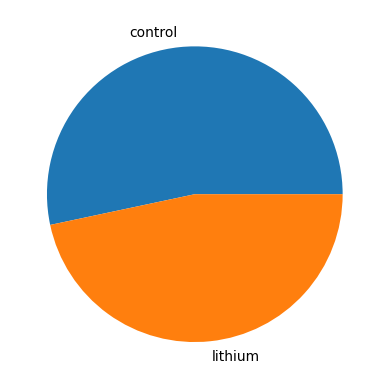

In [88]:
meta.groupby("agent").size().plot.pie()

### Relação entre Tratamento e Reposta


Para relacionar variáveis presentes nos metadados vamos agrupar por 'agent' e contar o numero das respostas permitidas no 'other'em cada grupo, controlo e com litio

In [13]:
# Agrupar por 'agent' e contar o número de respondeu e não respondeu em cada grupo
group_by_agent = meta.groupby(['agent', 'other']).size().unstack(fill_value=0)
group_by_agent

other,non-responder,responder
agent,,
control,56,8
lithium,38,18


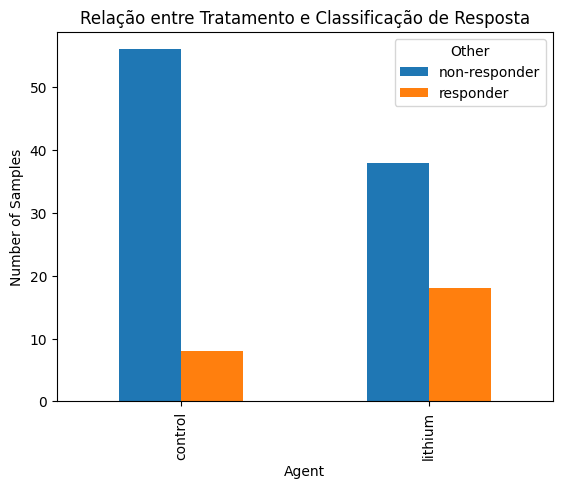

In [14]:
# Visualização gráfica

group_by_agent.plot.bar()

plt.title('Relação entre Tratamento e Classificação de Resposta')
plt.xlabel('Agent')
plt.ylabel('Number of Samples')
plt.legend(title='Other', loc='upper right')

Com isto, entende-se que o nosso dataset é composto por um número de amostras de pacientes a receber tratamento de conttrolo superior ao de pacientes a receber tratamento com lítio, e, ainda, que a proporção de pacientes que exibiram resposta biológica ao tratamento, ou seja, exibiram variação de expressão genética, sendo então classificados como 'responders' é bastante inferior aos que não exibiram resposta ('non-responders'). Pode-se inferir que o tratamento com lítio induziu uma resposta em cerca de metade dos pacientes, mas destaca-se também a existência de alguns pacientes a exibir resposta quando receberam somente o tratamento de controlo.

## Standardizing dos Dados 

### Tratamento dos Dados Nulos
Como visto na exploração de dados feita existem dados nulos, isto é uma problemática que tem de ser resolvida para que seja possivel continuar o processo desejado

In [17]:
data.isnull().sum().sum()

94080

In [18]:
meta.isnull().sum().sum()

0

Confirma-se a existencia de dados nulos no conjunto de dados referentes aos dados 

In [19]:
data.isnull().sum()

GSM1105438    784
GSM1105486    784
GSM1105487    784
GSM1105490    784
GSM1105491    784
             ... 
GSM1105525    784
GSM1105552    784
GSM1105452    784
GSM1105453    784
GSM1105456    784
Length: 120, dtype: int64

Eliminamos as linhas que continham pelo menos um valor nulo 

In [20]:
data = data.dropna()

In [21]:
data.values.shape

(47323, 120)

Confirma-se que os valores nulos foram eliminados 

### Transposição dos Dados

A disposição atual do conjunto de dados posiciona as amostras em colunas e os genes em linhas. Porém como os genes representam as características em análise, eles devem ser posicionados nas colunas. Portanto, o conjunto de dados precisa ser transposto.

In [22]:
data = data.transpose()
data.head()

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
GSM1105438,14.8983,12.1027,6.90845,6.97636,6.89734,7.01968,11.9813,7.94897,6.88075,7.05958,...,6.89246,6.78430,6.92158,6.92631,7.12904,6.77274,6.85770,7.08213,6.85267,7.81762
GSM1105486,14.7170,12.4403,6.63058,7.16577,6.84158,6.87300,12.9543,7.86514,6.87122,6.87390,...,6.92284,6.82762,7.09969,6.84452,6.92715,6.78293,6.81344,6.85598,6.74649,7.55871
GSM1105487,14.8411,12.4878,6.74203,7.23598,6.83540,7.13678,12.9664,8.50659,6.92326,6.91722,...,6.85514,6.67967,6.91126,6.79946,7.20899,6.73403,6.69688,6.96195,6.82538,7.69129
GSM1105490,14.9191,11.6591,6.84711,7.20855,6.86877,6.87585,13.4400,7.85840,6.79209,6.96697,...,6.86023,6.86298,7.09422,6.83745,7.18966,6.85946,6.69968,6.99962,6.96305,7.32495
GSM1105491,14.7371,11.9833,6.83116,7.17747,6.84190,6.91533,12.9282,7.71051,6.94781,7.10965,...,6.92191,6.79342,6.89431,6.91218,7.23281,6.87367,6.68000,6.88795,6.87131,7.90085


## Análise de Genes de Maior Relevância

### Testes Estatísticos Univariados 

De maneira a identificar os 10 genes principais, ou seja, os genes que apresentam maior relevência para os dados, utilizam-se métodos de SelectKBest para efetuar avaliaçoes de cada recurso (neste caso, de cada coluna correspondente a um gene) individualmente, com base numa métrica escolhida, selecionando, por fim, os 10 recursos com melhor pontuação.

In [23]:
# Selecionar os 10 melhores genes, com análises ANOVA
skb = SelectKBest(f_classif, k=10)

labels = data.iloc[:,0]
x_kbest = skb.fit_transform(data.iloc[:,1:], labels)

columns_best = data[skb.get_feature_names_out()]
data_kbest = pd.DataFrame(data=x_kbest, index=data.index, columns=columns_best.columns)
print(data_kbest.shape)
data_kbest.head()

(120, 10)


,ILMN_1669208,ILMN_1680435,ILMN_1722603,ILMN_1795356,ILMN_1801428,ILMN_1801769,ILMN_1864228,ILMN_2115534,ILMN_2179018,ILMN_2331501
GSM1105438,6.92317,7.18248,6.71232,6.85849,6.77757,6.76613,7.06989,6.78824,9.31056,14.9082
GSM1105486,6.82055,7.12180,6.81113,6.87268,6.63592,6.77801,7.00357,7.11131,10.11210,14.9082
GSM1105487,7.15070,7.24666,6.65014,6.86715,6.76708,6.86820,7.22832,6.99260,10.39390,14.9522
GSM1105490,6.84683,7.09110,6.65142,6.88523,6.66969,6.75132,6.88630,6.95294,10.16470,14.8983
GSM1105491,7.33096,6.92369,6.76451,6.91245,6.72857,6.83683,7.04353,7.02654,9.69256,14.9766


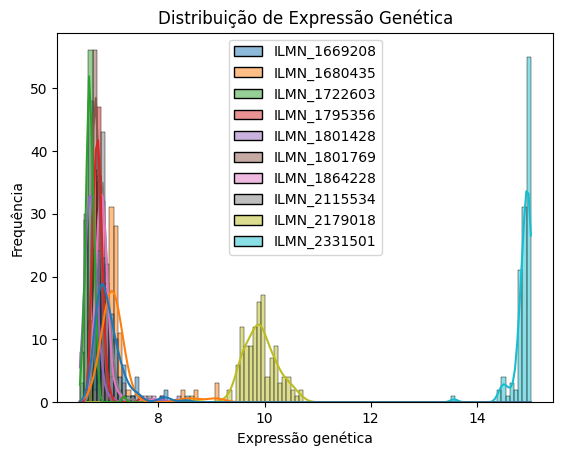

In [24]:
# Visualização gráfica de Distribuição de Expressão Genética dos 10 genes principais

sns.histplot(data_kbest, kde=True)
plt.xlabel('Expressão genética')
plt.ylabel('Frequência')
plt.title('Distribuição de Expressão Genética')
plt.show()

Com isto, consegue-se identificar os 10 genes cuja variação de expressão apresenta mais relevância para os dados a analisar. Ainda, com o histograma, é possível distinguir entre estes alguns que apresentam não só mais expressão genética, como também mais frequência. São exemplos destes os genes ILMN_2331501, ILMN_1722603, ILMN_1801769 e ILMN_1795356. Desta forma, pode-se deduzir que a variação de expressão genética destes genes é o fator que está mais fortemente relacionado com a resposta, ou a ausência desta, perante o tratamento com lítio. 

## Escolha de Metadados de Maior Relevância

Tendo como objetivo principal a classificação de individuos como responders ou non-responders, considerou-se mais relevantes os metadados relativos ao tipo de tratamento recebido, o momento de colheita de amostra e, por fim, o resultado da classificação final. Assim, procede-se o trabalho apenas com os seguintes metadados: "agent", "time", "other".

In [ ]:
meta_principais = meta[['agent', 'time', 'other']]
meta_principais

,agent,time,other
GSM1105438,control,baseline,non-responder
GSM1105486,control,baseline,non-responder
GSM1105487,control,baseline,non-responder
GSM1105490,control,baseline,non-responder
GSM1105491,control,baseline,non-responder
...,...,...,...
GSM1105525,lithium,1 month,responder
GSM1105552,lithium,1 month,responder
GSM1105452,lithium,1 month,responder
GSM1105453,lithium,1 month,responder


## Guardar dados e metadados trabalhados num novo ficheiro

In [168]:
data.to_csv("dados.csv")
meta_principais.to_csv("meta_dados.csv")